The following project show basic Python queries, which help to understand EDA and basic trends in data. 

In [1]:
#Importing the libraries.  
#Library is a collection of books or is a room or place where many books are stored to be used later.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv("../data/gdp_per_capita.csv")

In [3]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
...,...,...,...,...
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,footnoteSeqID,Footnote,NaN,NaN


In [5]:
#This is a list which contains the first top 10 rows. in a dataset

gdp_df[:10]

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


In [ ]:
#This is a list. The last 6 rows.

gdp_df[-6:]

In [6]:
#This code summarize the way to write code. To minimize multiple rows of code. 

gdp_df = (
    pd.read_csv("../data/gdp_per_capita.csv", skipfooter = 2, engine = 'python')
    .drop(columns = "Value Footnotes")    
    .rename(columns = {'Country or Area':'Country', 'Value': 'GDP_Per_Capita'})
)

In [7]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


In [13]:
#If any of the columns are not the expected types, figure out why and fix it.
#The following code fixed Dtypes of data. This is in order to 

gdp_df['Country'] = gdp_df['Country'].astype(str)
gdp_df['Year'] = gdp_df['Year'].astype(int)

In [14]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [15]:
sorted(gdp_df['Year'].unique())

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

In [16]:
gdp_df['Year'].value_counts().sort_index()

1990    207
1991    208
1992    209
1993    212
1994    214
1995    221
1996    221
1997    223
1998    223
1999    224
2000    231
2001    232
2002    233
2003    233
2004    234
2005    234
2006    235
2007    235
2008    235
2009    236
2010    236
2011    237
2012    237
2013    238
2014    238
2015    238
2016    238
2017    238
2018    237
2019    231
Name: Year, dtype: int64

In [17]:
#How many countries are represented in this dataset?
gdp_df['Country'].nunique()

238

In [18]:
gdp_df['Country'].value_counts().head(5)

Lebanon          30
Middle income    30
Morocco          30
Mozambique       30
Myanmar          30
Name: Country, dtype: int64

In [19]:
#Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

gdp_2014 = gdp_df.loc[gdp_df['Year'] == 2014]

In [20]:
gdp_2014['GDP_Per_Capita'].describe()

count       238.000000
mean      19766.710348
std       20983.869623
min         822.610458
25%        4753.110934
50%       12209.385755
75%       26803.610474
max      156514.133850
Name: GDP_Per_Capita, dtype: float64

In [21]:
gdp_2014.shape

(238, 3)

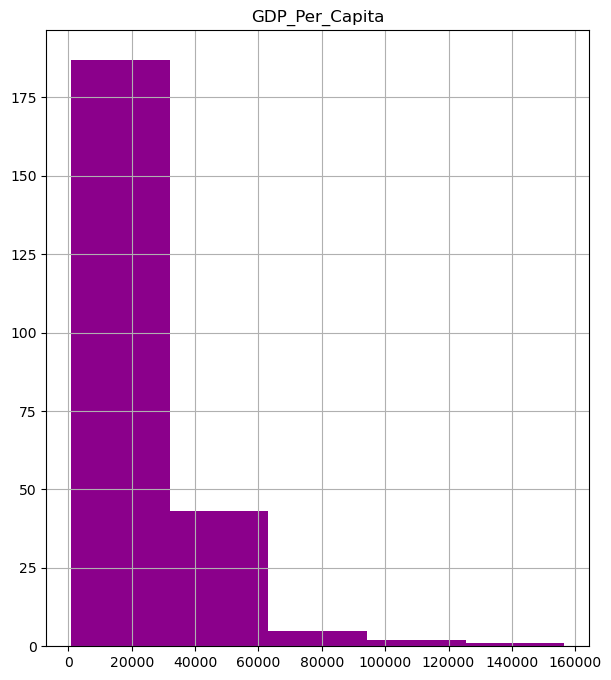

In [22]:
#Histogram of GDP Per Capita 2014 - The shape of the distribution is right skewed
gdp_2014.hist(column='GDP_Per_Capita',bins=5, figsize=(7,8), color='darkmagenta')
plt.show()

In [23]:
# top 5 counties and bottom 5 countries by GDP per capita in 2014
gdp_2014.nlargest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
3721,"Macao SAR, China",2014,156514.133850
3691,Luxembourg,2014,108760.916030
5138,Qatar,2014,95578.416973
5464,Singapore,2014,87808.663157
561,Bermuda,2014,77361.104881


In [24]:
#bottom 5 countries
gdp_2014.nsmallest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1047,Central African Republic,2014,822.610458
827,Burundi,2014,886.235777
3781,Malawi,2014,1027.208496
1422,Dem. Rep. Congo,2014,1029.790785
4528,Niger,2014,1127.615541


In [25]:
#Pivot the data for 1990 and 2017 
gdp_pivoted = gdp_df[(gdp_df["Year"] >= 1990) & (gdp_df["Year"] <= 2017 )]
gdp_pivoted = gdp_pivoted.pivot_table(index='Country', columns='Year', values='GDP_Per_Capita', dropna=True)
gdp_pivoted = gdp_pivoted.dropna(subset = [1990, 2017])
gdp_pivoted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Albania,4842.734635,3507.746654,3275.444336,3610.520633,3934.375728,4486.152092,4924.905836,4414.631173,4834.778357,5492.654212,...,9944.233283,10346.864199,10783.816180,11088.087801,11263.851342,11397.576226,11623.866679,11916.422315,12331.127754,12811.759436
Algeria,8746.352901,8431.385028,8383.770248,8027.376688,7792.085182,7935.179841,8116.962721,8074.759953,8360.150339,8506.345679,...,10796.901320,10782.361398,10970.705149,11078.240516,11233.534926,11319.097949,11512.705405,11696.963757,11826.164666,11737.409353
Angola,5783.429064,5649.782130,5148.252824,3788.508107,3717.366881,4139.640473,4551.651329,4728.157560,4792.683851,4740.669833,...,7864.375304,7643.493749,7692.434616,7675.445768,8036.690482,8140.527851,8239.828837,8036.410610,7568.997643,7310.901738
Antigua and Barbuda,15459.551675,15586.896172,15497.464744,15991.764201,16697.248772,15628.396992,16303.723892,16828.640823,17258.964856,17551.305968,...,23130.553123,20046.839017,18205.985369,17604.417102,17965.502327,17641.542533,18104.241470,18595.084904,19417.964819,19840.076123
Arab World,9694.667544,9651.626577,9933.531454,9927.649928,9957.387061,9913.934988,10136.058519,10311.064917,10624.718674,10606.027497,...,13261.601944,13063.094140,13347.112066,13531.438796,14032.961703,14155.876986,14219.562395,14441.436785,14663.549625,14555.474921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,2888.309393,2897.327707,2886.920558,2824.882319,2999.097317,2956.627999,2962.647258,3051.178566,3033.908413,2989.091261,...,3243.747862,3270.529800,3239.887824,3192.453639,3159.338400,3131.971868,3116.077025,3037.784742,3061.787240,3116.645194
Vietnam,1673.249634,1736.014139,1847.620675,1957.644497,2091.599402,2252.633886,2425.526266,2587.055148,2701.770578,2797.785536,...,4628.030244,4830.304958,5089.411248,5352.011422,5574.458880,5815.118920,6098.489609,6438.260271,6767.902495,7155.745829
World,9680.269697,9645.256163,9647.070526,9657.888486,9783.828893,9943.132889,10167.967706,10396.385330,10508.291266,10731.543649,...,13652.236548,13396.524163,13904.629132,14275.461871,14554.850133,14857.762340,15189.648507,15516.986524,15837.382961,16253.385518


In [26]:
#percent change in GDP_Per_Capita from 1990 to 2017. 
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]
gdp_pivoted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Albania,4842.734635,3507.746654,3275.444336,3610.520633,3934.375728,4486.152092,4924.905836,4414.631173,4834.778357,5492.654212,...,10346.864199,10783.816180,11088.087801,11263.851342,11397.576226,11623.866679,11916.422315,12331.127754,12811.759436,164.556297
Algeria,8746.352901,8431.385028,8383.770248,8027.376688,7792.085182,7935.179841,8116.962721,8074.759953,8360.150339,8506.345679,...,10782.361398,10970.705149,11078.240516,11233.534926,11319.097949,11512.705405,11696.963757,11826.164666,11737.409353,34.197756
Angola,5783.429064,5649.782130,5148.252824,3788.508107,3717.366881,4139.640473,4551.651329,4728.157560,4792.683851,4740.669833,...,7643.493749,7692.434616,7675.445768,8036.690482,8140.527851,8239.828837,8036.410610,7568.997643,7310.901738,26.411194
Antigua and Barbuda,15459.551675,15586.896172,15497.464744,15991.764201,16697.248772,15628.396992,16303.723892,16828.640823,17258.964856,17551.305968,...,20046.839017,18205.985369,17604.417102,17965.502327,17641.542533,18104.241470,18595.084904,19417.964819,19840.076123,28.335391
Arab World,9694.667544,9651.626577,9933.531454,9927.649928,9957.387061,9913.934988,10136.058519,10311.064917,10624.718674,10606.027497,...,13063.094140,13347.112066,13531.438796,14032.961703,14155.876986,14219.562395,14441.436785,14663.549625,14555.474921,50.138980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,2888.309393,2897.327707,2886.920558,2824.882319,2999.097317,2956.627999,2962.647258,3051.178566,3033.908413,2989.091261,...,3270.529800,3239.887824,3192.453639,3159.338400,3131.971868,3116.077025,3037.784742,3061.787240,3116.645194,7.905517
Vietnam,1673.249634,1736.014139,1847.620675,1957.644497,2091.599402,2252.633886,2425.526266,2587.055148,2701.770578,2797.785536,...,4830.304958,5089.411248,5352.011422,5574.458880,5815.118920,6098.489609,6438.260271,6767.902495,7155.745829,327.655604
World,9680.269697,9645.256163,9647.070526,9657.888486,9783.828893,9943.132889,10167.967706,10396.385330,10508.291266,10731.543649,...,13396.524163,13904.629132,14275.461871,14554.850133,14857.762340,15189.648507,15516.986524,15837.382961,16253.385518,67.902197


In [27]:
# countries experienced a negative percent change in GDP per capita
gdp_pivoted.loc[gdp_pivoted['Percent_Change']< 0].shape[0]

17

In [28]:
gdp_pivoted.nlargest(2, 'Percent_Change')

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Equatorial Guinea,1039.985049,996.857617,1299.934196,1395.403468,1572.065607,1781.264878,2857.452417,6868.480369,8166.052518,9851.190917,...,39913.732604,34732.255956,35378.023284,36671.357436,33678.706547,32436.466793,28313.602763,24827.072978,22551.083246,2068.404561
China,1423.896348,1534.705272,1731.657215,1949.534268,2178.924057,2391.477116,2601.363426,2812.711135,3004.427342,3206.730026,...,8069.354638,8884.588031,9686.615290,10397.561415,11149.867559,11917.338496,12691.821553,13487.822482,14344.421239,907.406281


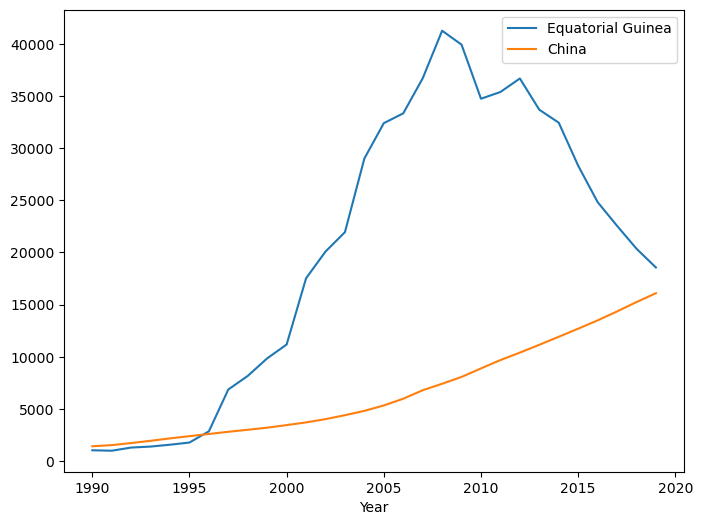

In [29]:
#line plot showing this country's GDP per capita for all years from 1990 to 2017.
fig, ax = plt.subplots(figsize = (8, 6))
gdp_df[gdp_df['Country'] == 'Equatorial Guinea'].plot(x='Year', y='GDP_Per_Capita', ax = ax)
gdp_df[gdp_df['Country'] == 'China'].plot(x='Year', y='GDP_Per_Capita', ax = ax)
ax.legend(labels=['Equatorial Guinea', 'China'])
plt.show()

In [30]:
# We will be using this dataframe to add a new column to our dataset.
continents = pd.read_csv("../data/continents.csv")

In [31]:
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [32]:
# Merge gdp_df and continents.
gdp_df.shape

(6868, 3)

In [33]:
continents.shape

(216, 2)

In [34]:
gdp_df = pd.merge(gdp_df,
                 continents[['Country', 'Continent']])
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2019,2065.036398,Asia
1,Afghanistan,2018,2033.779002,Asia
2,Afghanistan,2017,2058.383832,Asia
3,Afghanistan,2016,2057.062164,Asia
4,Afghanistan,2015,2068.265904,Asia


In [35]:
gdp_df

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2019,2065.036398,Asia
1,Afghanistan,2018,2033.779002,Asia
2,Afghanistan,2017,2058.383832,Asia
3,Afghanistan,2016,2057.062164,Asia
4,Afghanistan,2015,2068.265904,Asia
...,...,...,...,...
5438,Zimbabwe,1994,3263.934978,Africa
5439,Zimbabwe,1993,3033.504852,Africa
5440,Zimbabwe,1992,3054.889178,Africa
5441,Zimbabwe,1991,3426.598094,Africa


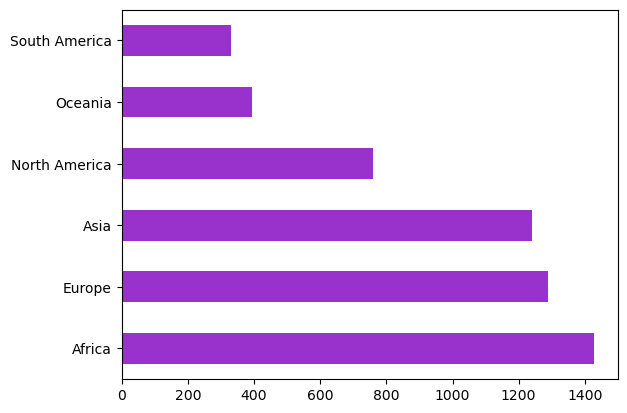

In [36]:
#Number of countries per continent
gdp_df['Continent'].value_counts().plot(kind='barh', color='darkorchid');

In [37]:
GDP_Per_Capita_2014 = gdp_df[gdp_df['Year']==2014]
GDP_Per_Capita_2014

,Country,Year,GDP_Per_Capita,Continent
5,Afghanistan,2014,2102.385234,Asia
23,Albania,2014,11623.866679,Europe
53,Algeria,2014,11512.705405,Africa
83,Angola,2014,8239.828837,Africa
113,Antigua and Barbuda,2014,18104.241470,North America
...,...,...,...,...
5302,Vanuatu,2014,3116.077025,Oceania
5332,Vietnam,2014,6098.489609,Asia
5362,West Bank and Gaza,2014,5967.073437,Asia
5388,Zambia,2014,3450.046561,Africa


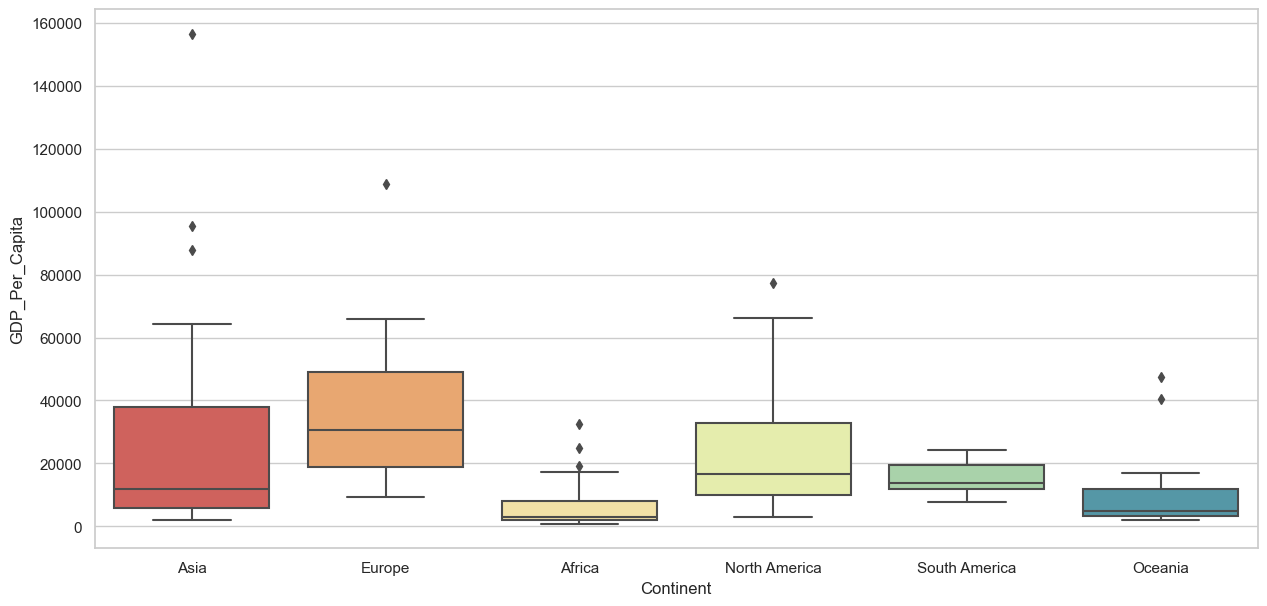

In [38]:
#seaborn boxplot showing GDP per capita in 2014 split out by continent.
sns.set(style="whitegrid")
plt.figure(figsize=(15, 7))
sns.boxplot(x='Continent', y='GDP_Per_Capita',
                data=GDP_Per_Capita_2014, palette="Spectral",
                dodge=True);

In [39]:
# csv containing Life expectancy at birth.
life_expectancy = pd.read_csv("../data/life_expectancy.csv", skiprows=3, engine = 'python')

In [40]:
life_expectancy

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,...,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,76.434000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,42.716053,43.166935,43.603990,44.025617,44.432721,44.826919,...,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213,64.325702,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,...,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,65.173000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.205380,37.632546,38.052612,38.463746,38.867073,39.264841,...,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723,58.445953,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,...,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000,61.487000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.797561,71.097561,71.346341,71.846341,72.295122,72.695122,73.092683,71.087805,NaN,NaN
262,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,29.919000,30.163000,30.500000,30.943000,31.501000,32.175000,...,66.016000,66.066000,66.085000,66.087000,66.086000,66.096000,66.125000,66.181000,NaN,NaN
263,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,48.406000,48.777000,49.142000,49.509000,49.888000,50.284000,...,61.099000,61.968000,62.649000,63.153000,63.538000,63.857000,64.131000,64.379000,NaN,NaN
264,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.687000,47.084000,47.446000,47.772000,48.068000,48.351000,...,59.746000,60.831000,61.737000,62.464000,63.043000,63.510000,63.886000,64.194000,NaN,NaN


In [41]:
#Drop the Country Code, Indicator Name, and Indicator Code columns. Then convert your data from wide to long.


life_expectancy = life_expectancy.drop(columns = ["Country Code","Indicator Name", "Indicator Code"])

In [42]:
life_expectancy

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,67.762000,68.095000,68.436000,...,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,76.434000,NaN,NaN
1,Africa Eastern and Southern,42.716053,43.166935,43.603990,44.025617,44.432721,44.826919,45.213048,45.594294,45.974059,...,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213,64.325702,NaN,NaN
2,Afghanistan,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,35.430000,35.914000,36.403000,...,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,65.173000,NaN,NaN
3,Africa Western and Central,37.205380,37.632546,38.052612,38.463746,38.867073,39.264841,39.662762,40.066408,40.482832,...,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723,58.445953,NaN,NaN
4,Angola,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,39.454000,39.813000,40.178000,...,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000,61.487000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.797561,71.097561,71.346341,71.846341,72.295122,72.695122,73.092683,71.087805,NaN,NaN
262,"Yemen, Rep.",29.919000,30.163000,30.500000,30.943000,31.501000,32.175000,32.960000,33.836000,34.780000,...,66.016000,66.066000,66.085000,66.087000,66.086000,66.096000,66.125000,66.181000,NaN,NaN
263,South Africa,48.406000,48.777000,49.142000,49.509000,49.888000,50.284000,50.705000,51.148000,51.615000,...,61.099000,61.968000,62.649000,63.153000,63.538000,63.857000,64.131000,64.379000,NaN,NaN
264,Zambia,46.687000,47.084000,47.446000,47.772000,48.068000,48.351000,48.643000,48.960000,49.313000,...,59.746000,60.831000,61.737000,62.464000,63.043000,63.510000,63.886000,64.194000,NaN,NaN


In [43]:
#multiple rows per country and a single column for year. After melting, rename the columns to Country, Year, and Life_Expectancy.

life_expectancy = life_expectancy.melt(
                  id_vars="Country Name",
                  var_name="Year", 
                  value_name="life_expectancy")

In [48]:
life_expectancy = life_expectancy.rename(columns = {'Country Name':'Country', 
                                       'Year':'Year', 
                                       'life_expectancy':'Life_Expectancy'})

life_expectancy

,Country,Year,Life_Expectancy
0,Aruba,1960,65.662000
1,Africa Eastern and Southern,1960,42.716053
2,Afghanistan,1960,32.446000
3,Africa Western and Central,1960,37.205380
4,Angola,1960,37.524000
...,...,...,...
16753,Kosovo,Unnamed: 66,NaN
16754,"Yemen, Rep.",Unnamed: 66,NaN
16755,South Africa,Unnamed: 66,NaN
16756,Zambia,Unnamed: 66,NaN


In [49]:
#What was the first country with a life expectancy to exceed 80? JAPAN
life_expectancy.loc[life_expectancy['Life_Expectancy'] >= 80]
               

,Country,Year,Life_Expectancy
9695,Japan,1996,80.200244
9938,"Hong Kong SAR, China",1997,80.126829
9961,Japan,1997,80.424146
10204,"Hong Kong SAR, China",1998,80.131707
10227,Japan,1998,80.501463
...,...,...,...
16158,Post-demographic dividend,2020,80.164363
16160,Qatar,2020,80.363000
16168,Singapore,2020,83.743902
16182,Slovenia,2020,80.531707


In [50]:
gdp_df.sort_values('Year', ascending = True)

,Country,Year,GDP_Per_Capita,Continent
5442,Zimbabwe,1990,3324.348171,Africa
315,Azerbaijan,1990,7758.154036,Europe
137,Antigua and Barbuda,1990,15459.551675,North America
3208,Micronesia,1990,2997.928734,Oceania
2329,Israel,1990,23618.608605,Asia
...,...,...,...,...
2480,Kenya,2019,4329.871390,Africa
1641,Finland,2019,48802.888097,Europe
1434,Egypt,2019,11763.253636,Africa
4378,Solomon Islands,2019,2662.802025,Oceania


In [51]:
#Merge gdp_per_capita and life_expectancy, keeping all countries and years that appear in both DataFrames.
gdp_df['Year'] = gdp_df['Year'].astype(str)
life_expectancy['Year'] = gdp_df['Year'].astype(str)

In [53]:
gdp_le = pd.merge(life_expectancy, gdp_df, on = ['Year', 'Country'])

#Look at the first five rows of your new data frame to confirm it merged correctly
gdp_le.head(5)

,Country,Year,Life_Expectancy,GDP_Per_Capita,Continent
0,Afghanistan,2017,32.446,2058.383832,Asia
1,Angola,2015,37.524,8036.410610,Africa
2,Albania,2014,62.283,11623.866679,Europe
3,United Arab Emirates,2011,51.537,56123.486157,Asia
4,Argentina,2010,65.055,23521.270176,South America


In [54]:
#check the last five rows to make sure the data is clean and as expected.
gdp_le.tail()

,Country,Year,Life_Expectancy,GDP_Per_Capita,Continent
3492,Germany,2001,72.677902,43651.395915,Europe
3493,Dominica,1999,NaN,9366.882551,North America
3494,Denmark,1998,74.101707,46243.565994,Europe
3495,Dominican Republic,1997,62.861000,8255.564811,North America
3496,Algeria,1996,58.198000,8116.962721,Africa


In [59]:
#How many countries have a life expectancy of at least 80 in 2019?
gdp_le_2019 = gdp_le[gdp_le['Year']== '2019']
gdp_le_2019=gdp_le_2019.dropna()

In [60]:
gdp_le[gdp_le["Life_Expectancy"] >= 80]
gdp_le.head()

,Country,Year,Life_Expectancy,GDP_Per_Capita,Continent
0,Afghanistan,2017,32.446,2058.383832,Asia
1,Angola,2015,37.524,8036.410610,Africa
2,Albania,2014,62.283,11623.866679,Europe
3,United Arab Emirates,2011,51.537,56123.486157,Asia
4,Argentina,2010,65.055,23521.270176,South America


In [91]:
#Find the countries that had the top 3 largest GDP per capita figures for 2019

gdptop10 = gdp_le.groupby(['Country', 'GDP_Per_Capita', 'Life_Expectancy']).size().to_frame('Year').sort_values('Year', ascending=False).reset_index()[:3]
gdptop10

,Country,GDP_Per_Capita,Life_Expectancy,Year
0,Slovenia,23411.869445,68.978049,2
1,Afghanistan,1189.784878,35.430000,1
2,Nicaragua,3606.359441,49.566000,1


In [94]:
#Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries.

gdp_facetgrid = sns.FacetGrid(data=gdp_le, col='Life_Expectancy')
gdp_facetgrid = gdp_facetgrid.map(plt.scatter, 'Country', 'GDP_Per_Capita')
plt.show()

ValueError: Image size of 957900x300 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function _draw_all_if_interactive at 0x7f79f9d52790> (for post_execute):


ValueError: Image size of 957900x300 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 957900x300 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 957900x300 with 3193 Axes>

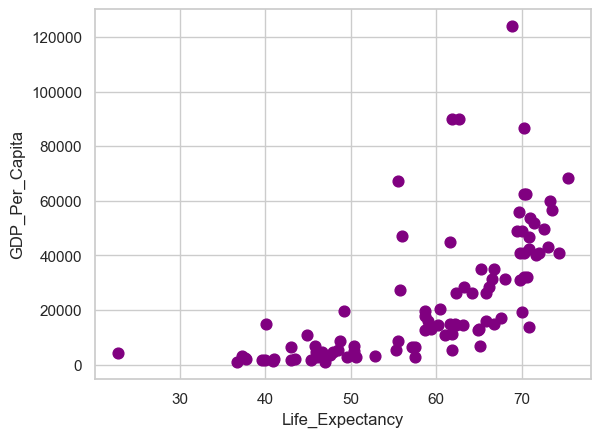

In [63]:
#Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2019.

#the larger the gdp_per_capita, the larger the life expectancy. 

gdp_le_2019.plot.scatter(x = 'Life_Expectancy', y = 'GDP_Per_Capita', s=60, c='purple');

In [ ]:
#Find the correlation between Life Expectancy and GDP per Capita for the year 2019

#the number means that there is a small correlation between the data

print(gdp_le_2019['Life_Expectancy'].corr(gdp_le_2019['GDP_Per_Capita']))

In [ ]:
#calculate the logarithm of GDP per capita
gdp_le_2019['GDP_log'] = np.log(gdp_le_2019['GDP_Per_Capita'])
gdp_le_2019

In [ ]:
#Find the correlation between the log of GDP per capita and life expectancy
gdp_le_2019_log = (gdp_le_2019['Life_Expectancy'].corr(gdp_le_2019['GDP_log']))
gdp_le_2019_log

In [ ]:
gdp_le_2019.plot.scatter(x = 'Life_Expectancy', y = 'GDP_log', s=60, c='slateblue');

In [ ]:
#Research question: Does countries with higher GDP Per Capita with higher Marriage rates?

In [ ]:
#From UN data imported Currently Married 

currently_married = pd.read_csv("../data/Currently married.csv", header=3, engine = 'python')

In [ ]:
#First I checked the data through a dataframe called currenlty_married

currently_married.head(2)

In [ ]:
#Dropped unnecesary data

currently_married = currently_married.drop(columns = ['ISO code', 'Period', 'Non-standard age groups', 'Including consensual unions', 'Source type', 'Source', 'Survey Name','Note on non-standard age groups', 'Note on country or population', 'Note on data source', 'Unnamed: 24'])

currently_married

In [ ]:
#Checking information about the data
currently_married.info()

In [ ]:
#Dropping unnecesary rows with Nan values
currently_married.drop(currently_married.tail(20).index,inplace=True) 

In [ ]:
currently_married = currently_married.dropna()

In [ ]:
currently_married['Year'] = currently_married['Year'].astype(int)

In [ ]:
currently_married

In [ ]:
#Checking the top married countries 

Top_currently_married = currently_married.nlargest(5, ['Married Total'])
Top_currently_married

In [ ]:
#Plotting the data

married_facetgrid = sns.FacetGrid(data=Top_currently_married, col='Married Total', hue='Sex')
married_facetgrid = married_facetgrid.map(plt.scatter, 'Married Total', 'Country')
plt.show();

In [ ]:
gdp_df

In [ ]:
gdp_df['Year'] = gdp_df['Year'].astype(str)

In [ ]:
currently_married['Year'] = currently_married['Year'].astype(str)

In [ ]:
#Merge Currenly_married with GDP_df

married_rate = pd.merge(currently_married, gdp_df, on = ['Year', 'Country'],how='outer')

In [ ]:
married_rate

In [ ]:
#Drop unnecesary columns
married_rate = married_rate.drop(columns = ['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65+'])

In [ ]:
married_rate

In [ ]:
top_married_rate = married_rate.nlargest(5, ['Married Total'])
top_married_rate

In [ ]:
sns.lmplot(x="Married Total", y="GDP_Per_Capita", data=top_married_rate,fit_reg=False, hue='Country')

plt.legend(loc='lower right')

plt.show()

In [ ]:
married_rate_1991 = married_rate[married_rate['Year']== '1991']
married_rate_1991

In [ ]:
print(married_rate_1991['Married Total'].corr(married_rate_1991['GDP_Per_Capita']))

In [ ]:
married_rate_1991.describe()

In [ ]:
married_rate_1991.plot.scatter(x = 'Married Total', y = 'GDP_Per_Capita', s=60, c='hotpink');

In [ ]:
gdp_le

In [ ]:
married_le = pd.merge(currently_married, gdp_le, on = ['Year', 'Country'],how='outer')

In [ ]:
married_le = married_le.drop(columns = ['15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65+'])
married_le

In [ ]:
married_le_2010 = married_le[married_le['Year']== '2010']
married_le_2010

In [ ]:
married_le_2010.plot.scatter(x = 'Married Total', y = 'GDP_Per_Capita', s=60, c='mediumturquoise');

In [ ]:
print(married_le_2010['Married Total'].corr(married_le_2010['GDP_Per_Capita']))